# Titanic Data Analysis: Project 2


## 1. Introduction
### Purpose:  To perform data analysis on a sample Titanic dataset.
This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained (https://www.kaggle.com/c/titanic/data). Our purpose is to analyze this data to get interesting answers of some pertinent questions.

## 2. Questions

* Which social class had a better chance of survival?
* Which gender had a better chance of survival?
* Which age group had a better chance of survival?

## 3. Data Description
Following is the basic description of the dataset which is available at the source of the data.
(from https://www.kaggle.com/c/titanic)<br />
**survival:** Survival (0 = No; 1 = Yes)<br />
**pclass:** Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) <br />
**name:** Name <br />
**sex:** Sex <br />
**age:** Age <br />
**sibsp:** Number of Siblings/Spouses Aboard <br />
**parch:** Number of Parents/Children Aboard <br />
**ticket:** Ticket Number <br />
**fare:** Passenger Fare <br />
**cabin:** Cabin<br />
**embarked:** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) <br /> 

 ## 3. Data Overview
  
In order to analyze the data, first import the necessary libraries and data. I took an over view of the data to get a basic understanding of the data. In the following table you can see the head of the data.


In [108]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import warnings
#show the top 5 rows of the dataset.
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  4. Data Cleaning


After taking an overview, I can see that there are some NaN values in the data, I used following 3 steps to clean the data for further analysis.
 * Identify and remove any duplicate entries 
 * Remove unnecessary columns
 * Fix missing and data format issues

### 4.1 Identify and remove any duplicate entries
The following code shows there are none duplicate values in our data.

In [109]:
#check for duplicates
titanic_data_duplicates = titanic_data.duplicated()
print 'Number of duplicate entries is/are {}'.format(titanic_data_duplicates.sum())

Number of duplicate entries is/are 0


### 4.2 Remove unnecessary columns
I removed columns like PassengerId, Name, Ticket, Cabin, Fare and Embarked. As they are not required for my analysis.
Removing  unnecessary columns also help us for faster processing of our data.
 


In [110]:
# Create new dataset without unwanted columns
titanic_data_cleaned = titanic_data.drop(['PassengerId','Name','Ticket','Fare','Embarked', 'Cabin'], axis=1)
titanic_data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


### 4.3 Fix missing and data format issues
In the following table, We can see Nan values in each columns. I remove all rows containing NaN values.

In [111]:
#Calculate number of missing values
titanic_data_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [112]:
#Checking the missing values
missing_age_bool = pd.isnull(titanic_data_cleaned['Age'])
titanic_data_cleaned[missing_age_bool].head()

,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,NaN,0,0
17,1,2,male,NaN,0,0
19,1,3,female,NaN,0,0
26,0,3,male,NaN,0,0
28,1,3,female,NaN,0,0


In [113]:
# checking info of the data.
titanic_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


In [114]:
#drop all NaN rows.
#We choose to drop all NaN values with respect to 'Age' for easy and simple analysis. 
titanic_data_cleaned_final = titanic_data_cleaned.dropna(axis=0, how='any', subset=['Age'])
titanic_data_cleaned_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 39.0+ KB


In [115]:
#no NaN values left in Data.
titanic_data_cleaned_final.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64


## 5. Which social class had a better chance of survival?


As there were limited life boats in titanic, I analyzed if people who were rich or people who had high class ticket for titanic were given any preference while saving lives.

* Class 1 : Upper
* Class 2 : Medium
* Class 3 : Lower

In [116]:
#let us check the sum of survivors and non survivors
survivors_sum = (titanic_data_cleaned_final['Survived'] == 1).sum()
print survivors_sum
non_survivors_sum = (titanic_data_cleaned_final['Survived'] == 0).sum()
print non_survivors_sum

290
424


In [117]:
#we also make new variables for survivors and non survivors per class
survivor_class = titanic_data_cleaned_final.groupby('Pclass').Survived.sum()
print survivor_class
total_class = titanic_data_cleaned_final.groupby('Pclass').Survived.count()
print total_class

Pclass
1    122
2     83
3     85
Name: Survived, dtype: int64
Pclass
1    186
2    173
3    355
Name: Survived, dtype: int64


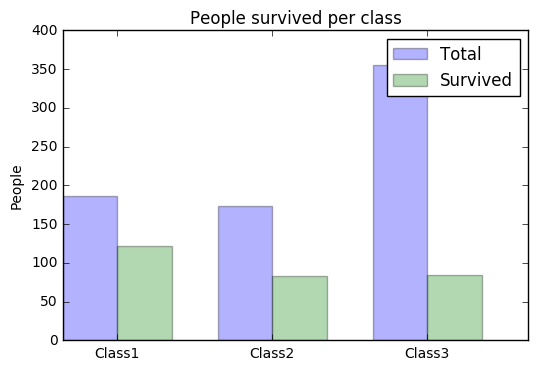

In [137]:
# data to plot
n_groups = 3

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.3
 
rects1 = plt.bar(index, total_class, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Total')
 
rects2 = plt.bar(index + bar_width, survivor_class, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Survived')

plt.ylabel('People')
plt.title('People survived per class')
plt.xticks(index + bar_width, ('Class1', 'Class2', 'Class3'))
plt.legend()

plt.show()

**We notice how class 3 people being highest in number, they survived lowest.**

In [119]:
survived_class = pd.crosstab(titanic_data_cleaned_final['Survived'],titanic_data_cleaned_final['Pclass'])
print survived_class

Pclass      1   2    3
Survived              
0          64  90  270
1         122  83   85


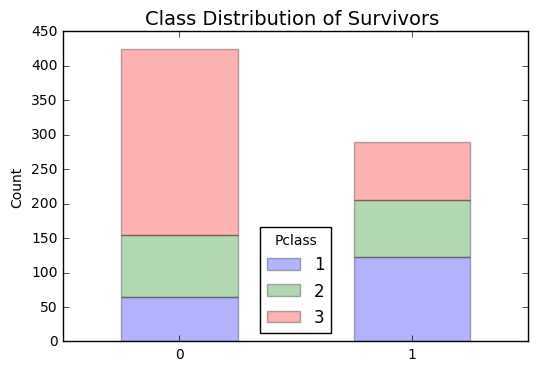

In [120]:
#another plot to get a clear picture.
survived_class.plot(kind='bar',stacked=True, alpha= 0.3)
plt.title("Class Distribution of Survivors ",fontsize=14)
plt.ylabel('Count')
plt.xlabel('');
plt.xticks(rotation='horizontal')
plt.show()

In [121]:
#mean survivor per class
mean_class = titanic_data_cleaned_final.groupby('Pclass').Survived.mean()
print mean_class

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64


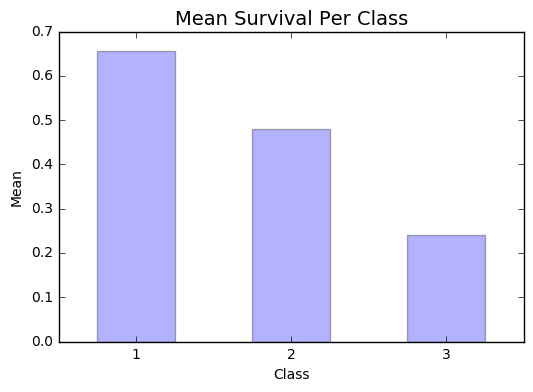

In [122]:
mean_class.plot(kind='bar',stacked=True, alpha= 0.3)
plt.title("Mean Survival Per Class",fontsize=14)
plt.ylabel('Mean')
plt.xlabel('Class');
plt.xticks(rotation='horizontal')
plt.show()


** Mean plot do a clear depiction that upper class was favoured in saving lives. **

# 6. Which gender had a better chance of survival?

Did any gender were given preference while saving lives? Let us look at the data with various plots to find our answer. 

In [123]:
#gender wise survivors and non survivors
gender_survivors = pd.crosstab(titanic_data_cleaned_final['Survived'],titanic_data_cleaned_final['Sex'])
print gender_survivors

Sex       female  male
Survived              
0             64   360
1            197    93


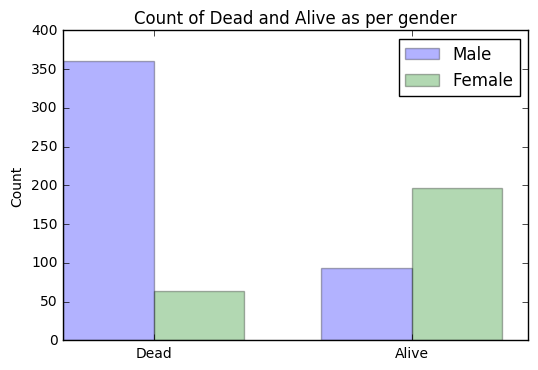

In [124]:
n_groups = 2

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.3
 

rects1 = plt.bar(index, gender_survivors['male'], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Male')
 
rects2 = plt.bar(index + bar_width, gender_survivors['female'], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Female')
 
plt.ylabel('Count')
plt.title('Count of Dead and Alive as per gender')
plt.xticks(index + bar_width, ('Dead', 'Alive'))
plt.legend()

plt.show()

** We can see that female survivors are more than male, Also males died more than female**

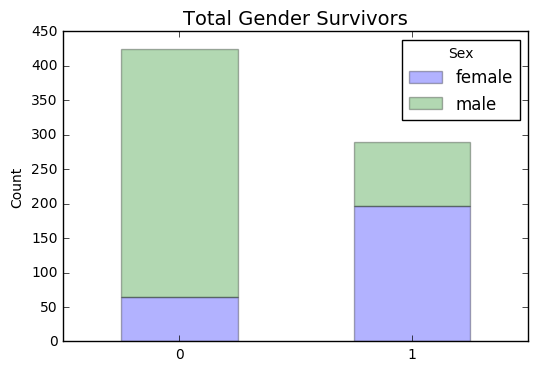

In [125]:
#another plot for clear picture.
gender_survivors.plot(kind='bar',stacked=True, alpha= 0.3)
plt.title("Total Gender Survivors",fontsize=14)
plt.ylabel('Count')
plt.xlabel('');
plt.xticks(rotation='horizontal')
plt.show()

In [126]:
#let us check the mean survivors per gender
gender_mean = titanic_data_cleaned_final.groupby('Sex').Survived.mean()
print gender_mean

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64


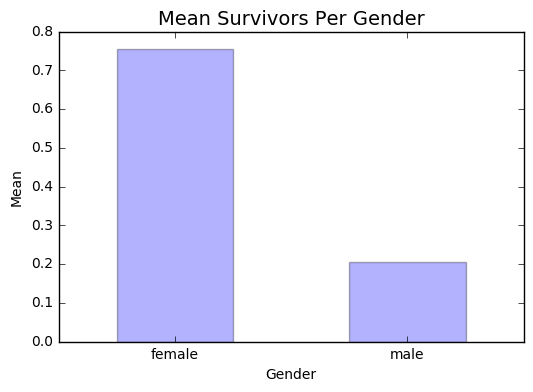

In [127]:
gender_mean.plot(kind='bar',stacked=True, alpha= 0.3)
plt.title("Mean Survivors Per Gender",fontsize=14)
plt.ylabel('Mean')
plt.xlabel('Gender');
plt.xticks(rotation='horizontal')
plt.show()

** Above plot shows huge differnce between male and female survivors in mean. **

# 7. Which age group had a better chance of survival?

At the time of a catastrophe, Morally children are given a priority while saving lives. We look at this aspect while analyzing our data tha


In [128]:
#below tables shows need for a new variable for age group.
table_Age = pd.crosstab(titanic_data_cleaned_final['Survived'],titanic_data_cleaned_final['Age'])
print table_Age

Age       0.42   0.67   0.75   0.83   0.92   1.00   2.00   3.00   4.00   \
Survived                                                                  
0             0      0      0      0      0      2      7      1      3   
1             1      1      2      2      1      5      3      5      7   

Age       5.00   ...    62.00  63.00  64.00  65.00  66.00  70.00  70.50  \
Survived         ...                                                      
0             0  ...        2      0      2      3      1      2      1   
1             4  ...        2      2      0      0      0      0      0   

Age       71.00  74.00  80.00  
Survived                       
0             2      1      0  
1             0      0      1  

[2 rows x 88 columns]


In [129]:
#Let us distribute people in bin size of 10.
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
titanic_data_cleaned_final['age_group'] = pd.cut(titanic_data_cleaned_final.Age, range(0, 81, 10), right=False, labels=age_labels)

#ignore warning
warnings.filterwarnings('ignore')

In [130]:
# Below table shows our new column age_group.
titanic_data_cleaned_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,age_group
0,0,3,male,22.0,1,0,20-29
1,1,1,female,38.0,1,0,30-39
2,1,3,female,26.0,0,0,20-29
3,1,1,female,35.0,1,0,30-39
4,0,3,male,35.0,0,0,30-39


In [131]:
#Let us check the mean age of the data.
print titanic_data_cleaned_final["Age"].mean()

29.6991176471


In [132]:
#People count in each age group.
print titanic_data_cleaned_final.groupby('age_group').Age.count()

age_group
0-9       62
10-19    102
20-29    220
30-39    167
40-49     89
50-59     48
60-69     19
70-79      6
Name: Age, dtype: int64


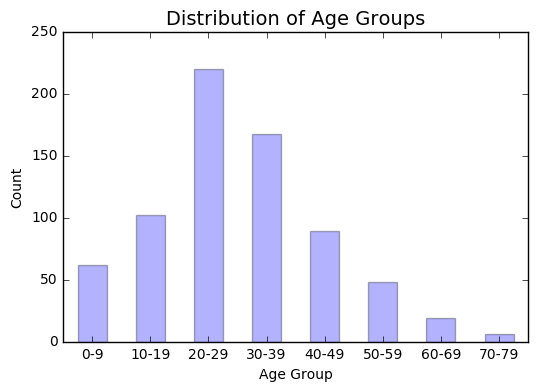

In [133]:
titanic_data_cleaned_final.groupby(['age_group']).size().plot(kind='bar',stacked=True, alpha= 0.3)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');
plt.xticks(rotation='horizontal')
plt.show()

**Plot shows people with age group 20-29 and 30-39 were more in titanic **

In [134]:
#let us check the survivors mean per age group
titanic_data_cleaned_final.groupby('age_group').Survived.mean()

age_group
0-9      0.612903
10-19    0.401961
20-29    0.350000
30-39    0.437126
40-49    0.382022
50-59    0.416667
60-69    0.315789
70-79    0.000000
Name: Survived, dtype: float64

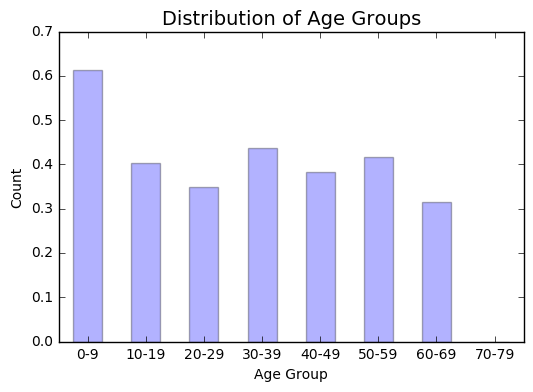

In [135]:
titanic_data_cleaned_final.groupby(['age_group']).Survived.mean().plot(kind='bar',stacked=True, alpha= 0.3)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');
plt.xticks(rotation='horizontal')
plt.show()

** We do not see any clear trend in mean survivors of different age group. **

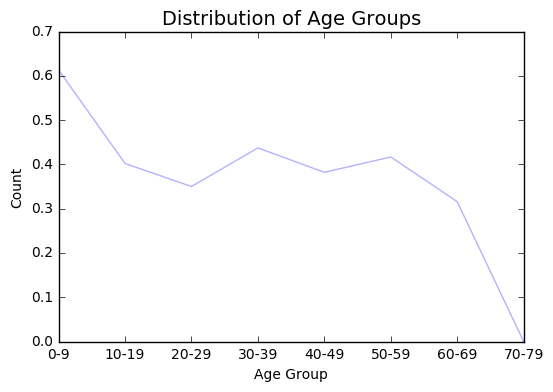

In [136]:
titanic_data_cleaned_final.groupby(['age_group']).Survived.mean().plot(kind='line',stacked=True, alpha= 0.3)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');
plt.show()

** Although we do not see a clear trend between age [10-70], But we do notice children[0-9] were given priority in saving lives by elderly people [60-79]. **

## Conclusion:-


1. We notice that upper class was given priority while saving lives, Our analysis clearly depicts that despite class 3 people were higher in number, they survived less. 


2. Women were also given priority while saving lives. We see huge difference in the mean of survivability of male and female.


3. We do not notice any clear trend in survivability by age group, But we can say that children with age group 0-9 were given priority over elderly people with age group 60-79. 

## Issues:-
1. To remove rows with missing values for consistency in data.
2. To make new a variable from age to age group.


#### References
1. https://www.kaggle.com/c/titanic/data
2. http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/master/cookbook/